In [1]:
import numpy as np
from numpy import mean, std
import pandas as pd
from sklearn.metrics import accuracy_score, make_scorer, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC # for Support Vector Classification model
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization


import matplotlib.pyplot as plt
import seaborn as sns


# Tensorflow
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
import tensorflow_datasets as tfds




import time

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


c:\Users\andly\.conda\envs\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def convert_sample(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image,[64,64]).numpy()
    image = image.reshape(1,-1)
    return image
    24

In [3]:
data_dir = r'C:\Users\andly'
print('Current data dir '+data_dir)

Current data dir C:\Users\andly


In [4]:
tf.random.set_seed(88)
ds1,ds2,ds3 = tfds.load('patch_camelyon',
                    split=['train[:5%]','test[:5%]','validation[:5%]'],
                    data_dir = data_dir,
                    download=False,
                    batch_size=-1, # All data...no batches needed 
                    as_supervised=True, # So that we easily can transform data to numpy format
                    shuffle_files=True)
print('Done Loading Data')



Done Loading Data


In [7]:

train_dataset = tfds.as_numpy(ds1) # FULL DATA
train_dataset_image = np.vstack(list(map(convert_sample,train_dataset[0]))) # <-- This is the X
train_dataset_image_Scaled = StandardScaler(with_mean=0, with_std=1).fit_transform(train_dataset_image)
train_dataset_label = train_dataset[1].reshape(-1,) # <-- This is y   
print(f'Shape of training data features (observations,features): {train_dataset_image_Scaled.shape}')
print(f'Shape of training data labels (observations,): {train_dataset_label.shape}')

validation_dataset = tfds.as_numpy(ds3)
validation_dataset_image = np.vstack(list(map(convert_sample,validation_dataset[0])))
validation_dataset_image_Scaled = StandardScaler(with_mean=0, with_std=1).fit_transform(validation_dataset_image)
validation_dataset_label = validation_dataset[1].reshape(-1,) 

test_dataset = tfds.as_numpy(ds2)
test_dataset_image = np.vstack(list(map(convert_sample,test_dataset[0]))) # <-- X_test
test_dataset_image_Scaled = StandardScaler(with_mean=0, with_std=1).fit_transform(test_dataset_image)
test_dataset_label = test_dataset[1].reshape(-1,)
print("Done spliting data")

c:\Users\andly\.conda\envs\venv\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Shape of training data features (observations,features): (13107, 4096)
Shape of training data labels (observations,): (13107,)


c:\Users\andly\.conda\envs\venv\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Done spliting data


c:\Users\andly\.conda\envs\venv\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [ ]:



# SVM Estimator

# initialize the SVM model
svm = SVC()

# define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 7], 'kernel': ['poly', 'rbf']}
# perform grid search using the SVM model and the parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5, verbose=4)
#grid_search.fit(train_dataset_image_Scaled, train_dataset_label)

# print the best parameters
#print("Best parameters: ", grid_search.best_params_)
  



In [ ]:
svm_tuned = SVC(C=0.1, kernel='rbf')

svm_tuned.fit(train_dataset_image_Scaled, train_dataset_label)

# make predictions on the training set
y_train_pred = svm_tuned.predict(train_dataset_image_Scaled)

# Compute the accuracy on the training set
train_accuracy = accuracy_score(train_dataset_label, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Compute the precision on the training set
train_precision = precision_score(train_dataset_label, y_train_pred)
print("Training Precision:", train_precision)

# Compute the recall on the training set
train_recall = recall_score(train_dataset_label, y_train_pred)
print("Training Recall:", train_recall)

# Compute the F1-score on the training set
train_f1 = f1_score(train_dataset_label, y_train_pred)
print("Training F1-score:", train_f1)





# Make predictions on the validation set
y_val_pred = svm_tuned.predict(validation_dataset_image_Scaled)

# Compute the accuracy on the validation set
val_accuracy = accuracy_score(validation_dataset_label, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Compute the precision on the validation set
val_precision = precision_score(validation_dataset_label, y_val_pred)
print("Validation Precision:", val_precision)

# Compute the recall on the validation set
val_recall = recall_score(validation_dataset_label, y_val_pred)
print("Validation Recall:", val_recall)

# Compute the F1-score on the validation set
val_f1 = f1_score(validation_dataset_label, y_val_pred)
print("Validation F1-score:", val_f1)

# Make predictions on the test set
y_test_pred = svm_tuned.predict(test_dataset_image_Scaled)

# Compute the accuracy on the test set
test_accuracy = accuracy_score(test_dataset_label, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Compute the precision on the test set
test_precision = precision_score(test_dataset_label, y_test_pred)
print("Test Precision:", test_precision)

# Compute the recall on the test set
test_recall = recall_score(test_dataset_label, y_test_pred)
print("Test Recall:", test_recall)

# Compute the F1-score on the test set
test_f1 = f1_score(test_dataset_label, y_test_pred)
print("Test F1-score:", test_f1)

In [ ]:
# Get the training and validation accuracy
train_acc = svm_tuned.score(train_dataset_image_Scaled, train_dataset_label)
val_acc = svm_tuned.score(validation_dataset_label, validation_dataset_label)


In [ ]:
train_acc.reshape(1, -1)
val_acc.reshape(1, -1)

# Plot the training and validation accuracy
plt.plot([0, 1], [train_acc, val_acc], label=['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=(train=0.765, test=0.720) total time=   7.0s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=(train=0.758, test=0.733) total time=   5.6s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=(train=0.761, test=0.717) total time=   5.3s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=500;, score=(train=0.797, test=0.733) total time=   9.7s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=500;, score=(train=0.790, test=0.749) total time=  10.2s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=500;, score=(train=0.796, test=0.739) total time=   9.8s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=900;, score=(train=0.816, test=0.737) total time=  14.0s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=900;, score=(train=0.810, test=0.753) total time=  14.0s
[CV 3/3] END learni

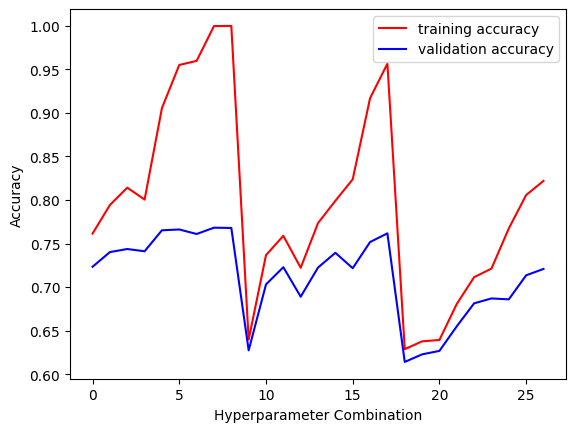

In [8]:
# XGBOOST Estimator

xgb_tuned = XGBClassifier(tree_method="gpu_hist", gpu_id=0)

# Define the parameter grid for the grid search
param_grid = {
    'max_depth': [1, 2, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 900],
    
    
}

# Initialize the XGBClassifier


#Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, cv=3, verbose=4, return_train_score=True)

#Fit the GridSearchCV to the training data
grid_search.fit(train_dataset_image_Scaled, train_dataset_label)

# Plot the mean training and validation accuracy for each hyperparameter combination
mean_train_scores = np.array(grid_search.cv_results_['mean_train_score'])
mean_test_scores = np.array(grid_search.cv_results_['mean_test_score'])

plt.plot(np.arange(len(grid_search.cv_results_['params'])), mean_train_scores, 'r', label='training accuracy')
plt.plot(np.arange(len(grid_search.cv_results_['params'])), mean_test_scores, 'b', label='validation accuracy')
plt.legend()
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.show()
# xgb_hyper = XGBClassifier(tree_method="gpu_hist", gpu_id=0, learning_rate=0.1, max_depth=5, n_estimators=300)

# xgb_hyper.fit(train_dataset_image_Scaled, train_dataset_label)
# Print the best parameters
#print("Best parameters:", grid_search.best_params_)





In [14]:
xgb_hyper = XGBClassifier(tree_method="gpu_hist", gpu_id=0, learning_rate=0.1, max_depth=2, n_estimators=300, eta=0.05)

xgb_hyper.fit(train_dataset_image_Scaled, train_dataset_label)


# Make predictions on the training set
y_train_pred = xgb_hyper.predict(train_dataset_image_Scaled)
# Compute the accuracy on the training set
train_accuracy = accuracy_score(train_dataset_label, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Compute the precision on the training set
train_precision = precision_score(train_dataset_label, y_train_pred)
print("Training Precision:", train_precision)

# Compute the recall on the training set
train_recall = recall_score(train_dataset_label, y_train_pred)
print("Training Recall:", train_recall)

# Compute the F1-score on the training set
train_f1 = f1_score(train_dataset_label, y_train_pred)
print("Training F1-score:", train_f1)

# Make predictions on the validation set
y_val_pred = xgb_hyper.predict(validation_dataset_image_Scaled)

# Compute the accuracy on the validation set
val_accuracy = accuracy_score(validation_dataset_label, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Compute the precision on the validation set
val_precision = precision_score(validation_dataset_label, y_val_pred)
print("Validation Precision:", val_precision)

# Compute the recall on the validation set
val_recall = recall_score(validation_dataset_label, y_val_pred)
print("Validation Recall:", val_recall)

# Compute the F1-score on the validation set
val_f1 = f1_score(validation_dataset_label, y_val_pred)
print("Validation F1-score:", val_f1)

# Make predictions on the test set
y_test_pred = xgb_hyper.predict(test_dataset_image_Scaled)

# Compute the accuracy on the test set
test_accuracy = accuracy_score(test_dataset_label, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Compute the precision on the test set
test_precision = precision_score(test_dataset_label, y_test_pred)
print("Test Precision:", test_precision)

# Compute the recall on the test set
test_recall = recall_score(test_dataset_label, y_test_pred)
print("Test Recall:", test_recall)

# Compute the F1-score on the test set
test_f1 = f1_score(test_dataset_label, y_test_pred)
print("Test F1-score:", test_f1)

Training Accuracy: 0.8408484016174563
Training Precision: 0.8265455610899501
Training Recall: 0.8621638141809291
Training F1-score: 0.8439790575916231
Validation Accuracy: 0.7515262515262515
Validation Precision: 0.7683397683397684
Validation Recall: 0.7245145631067961
Validation F1-score: 0.7457838850718301
Test Accuracy: 0.7393162393162394
Test Precision: 0.7336683417085427
Test Recall: 0.7309136420525657
Test F1-score: 0.7322884012539184


In [15]:
# Ensemble Learning with non-deep learning

import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss


# # Initialize the classifiers
# svm = SVC(kernel='rbf', C=1)
# rf = RandomForestClassifier(n_estimators=300)
# xgb = XGBClassifier(tree_method="gpu_hist", gpu_id=0, max_depth=5, objective='binary:logistic', n_estimators=300, eta=0.05)
# gb = GradientBoostingClassifier(n_estimators=300)

# Initialize the classifiers
rf = RandomForestClassifier(n_estimators=300)
gb = GradientBoostingClassifier(n_estimators=300)
xgb = XGBClassifier(tree_method="gpu_hist", gpu_id=0, max_depth=2, n_estimators=300, eta=0.05, learning_rate=0.1)


# Create the ensemble model
ensemble = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('gb',gb)], final_estimator=LogisticRegression())

# Fit the ensemble model to the training data
ensemble.fit(train_dataset_image_Scaled, train_dataset_label)


# Predict the target variable for the training data and validation data
train_pred = ensemble.predict(X_train)
test_pred = ensemble.predict(X_test)

# Compute the accuracy for the training data and validation data
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Compute the log loss for the training data and validation data
train_loss = log_loss(y_train, train_pred)
test_loss = log_loss(y_test, test_pred)

# Plot the accuracy scores for the training and validation data
plt.plot([0, 1], [train_acc, test_acc], 'b', label='Accuracy')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.show()

# Plot the loss values for the training and validation data
plt.plot([0, 1], [train_loss, test_loss], 'r', label='Loss')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Loss')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.show()




KeyboardInterrupt: 

In [ ]:
# Make predictions on the test data
y_train_pred = ensemble.predict(train_dataset_image_Scaled)
# Compute the accuracy on the training set
train_accuracy = accuracy_score(train_dataset_label, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Compute the precision on the training set
train_precision = precision_score(train_dataset_label, y_train_pred)
print("Training Precision:", train_precision)

# Compute the recall on the training set
train_recall = recall_score(train_dataset_label, y_train_pred)
print("Training Recall:", train_recall)

# Compute the F1-score on the training set
train_f1 = f1_score(train_dataset_label, y_train_pred)
print("Training F1-score:", train_f1)


# Make predictions on the validation set
y_val_pred = ensemble.predict(validation_dataset_image_Scaled)

# Compute the accuracy on the validation set
val_accuracy = accuracy_score(validation_dataset_label, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Compute the precision on the validation set
val_precision = precision_score(validation_dataset_label, y_val_pred)
print("Validation Precision:", val_precision)

# Compute the recall on the validation set
val_recall = recall_score(validation_dataset_label, y_val_pred)
print("Validation Recall:", val_recall)

# Compute the F1-score on the validation set
val_f1 = f1_score(validation_dataset_label, y_val_pred)
print("Validation F1-score:", val_f1)

# Make predictions on the test set
y_test_pred = ensemble.predict(test_dataset_image_Scaled)

# Compute the accuracy on the test set
test_accuracy = accuracy_score(test_dataset_label, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Compute the precision on the test set
test_precision = precision_score(test_dataset_label, y_test_pred)
print("Test Precision:", test_precision)

# Compute the recall on the test set
test_recall = recall_score(test_dataset_label, y_test_pred)
print("Test Recall:", test_recall)

# Compute the F1-score on the test set
test_f1 = f1_score(test_dataset_label, y_test_pred)
print("Test F1-score:", test_f1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
    'bootstrap': ['True', 'False']

}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Initialize the GridSearchCV
grid_search2 = GridSearchCV(rf, param_grid, cv=3)

# Fit the GridSearchCV to the training data
#grid_search2.fit(train_dataset_image_Scaled, train_dataset_label)

# Print the best parameters
#print("Best parameters:", grid_search2.best_params_)



In [ ]:
# New rf with hyperparameters found
rf_hyper = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200)


rf.fit(train_dataset_image_Scaled, train_dataset_label)
# Make predictions on the training set
y_train_pred = rf.predict(train_dataset_image_Scaled)

# Compute the accuracy on the training set
train_accuracy = accuracy_score(train_dataset_label, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Compute the precision on the training set
train_precision = precision_score(train_dataset_label, y_train_pred)
print("Training Precision:", train_precision)

# Compute the recall on the training set
train_recall = recall_score(train_dataset_label, y_train_pred)
print("Training Recall:", train_recall)

# Compute the F1-score on the training set
train_f1 = f1_score(train_dataset_label, y_train_pred)
print("Training F1-score:", train_f1)

# Make predictions on the validation set
y_val_pred = rf.predict(validation_dataset_image_Scaled)

# Compute the accuracy on the validation set
val_accuracy = accuracy_score(validation_dataset_label, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Compute the precision on the validation set
val_precision = precision_score(validation_dataset_label, y_val_pred)
print("Validation Precision:", val_precision)

# Compute the recall on the validation set
val_recall = recall_score(validation_dataset_label, y_val_pred)
print("Validation Recall:", val_recall)

# Compute the F1-score on the test set
val_f1 = f1_score(validation_dataset_label, y_test_pred)
print("Val F1-score:", val_f1)

# Make predictions on the test set
y_test_pred = rf.predict(test_dataset_image_Scaled)

# Compute the accuracy on the test set
test_accuracy = accuracy_score(test_dataset_label, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Compute the precision on the test set
test_precision = precision_score(test_dataset_label, y_test_pred)
print("Test Precision:", test_precision)

# Compute the recall on the test set
test_recall = recall_score(test_dataset_label, y_test_pred)
print("Test Recall:", test_recall)

# Compute the F1-score on the test set
test_f1 = f1_score(test_dataset_label, y_test_pred)
print("Test F1-score:", test_f1)